# Intro to Clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X, y =make_blobs(
    n_samples=100,
    centers=4,
    n_features=2,
    random_state=42,
    cluster_std=[1,1.5,2,2]
)

In [ ]:
X.shape

(100, 2)

In [ ]:
y

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1])

In [ ]:
df_blobs = pd.DataFrame(
    {
        "x1": X[:,0],
        "x2": X[:,1],
        "y": y
    }
)
df_blobs

,x1,x2,y
0,-10.531915,4.293828,3
1,-5.252593,-9.341838,2
2,-2.978672,9.556846,0
3,-4.074039,-9.683812,2
4,-8.122753,8.445092,3
...,...,...,...
95,-3.186120,9.625962,0
96,-1.478198,9.945566,0
97,4.397950,2.579246,1
98,-6.672225,9.431127,3


In [ ]:
def plot_2d_clusters(X, y, ax):
    y_uniques = pd.Series(y).unique() # 0, 1, 2, 3 values
    for _ in y_uniques:
        X[y==_].plot(
            x="x1", 
            y ="x2", # Two dimensions: x1 and x2
            ax=ax, 
            title=f"{len(y_uniques)}",
            kind="scatter",
            marker=f"${_}$"
        )

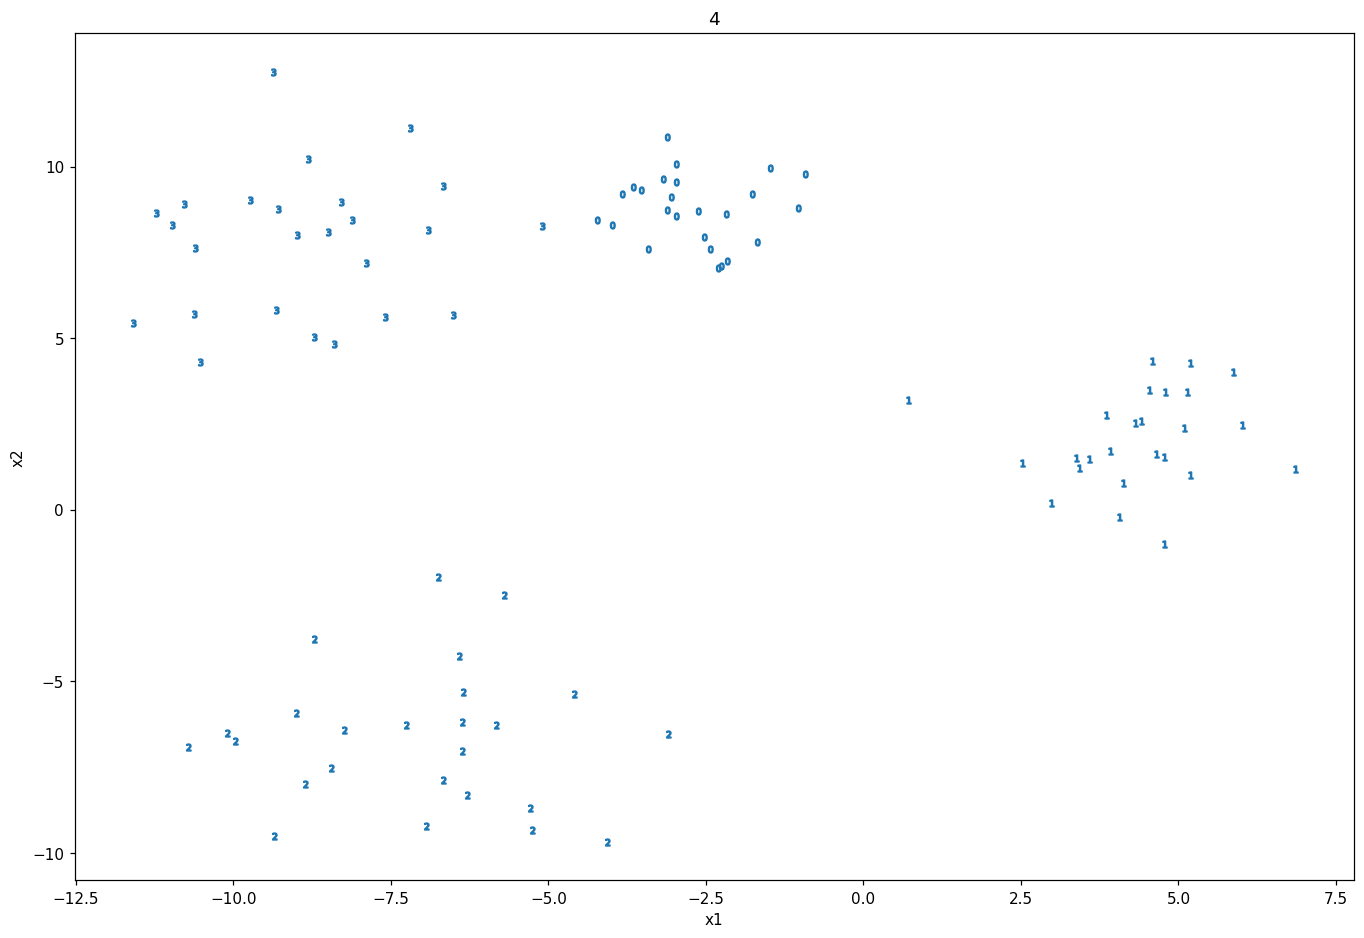

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,10), dpi=110)
x, y = df_blobs[["x1", "x2"]], df_blobs["y"]
plot_2d_clusters(x, y, ax)

## Applying Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=7)

In [ ]:
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 2, 3, 2, 0, 2, 1, 1, 1, 3, 3, 2, 2, 1, 3, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 1, 3, 1, 0, 0, 2, 2, 1, 2, 0, 3, 3, 3, 3, 1, 1, 0, 1, 2, 3,
       3, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 3, 3, 1, 3, 2, 1, 0, 2, 0, 0,
       2, 0, 1, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 1, 2, 3, 3, 3, 3, 3, 2,
       3, 1, 1, 2, 3, 2, 3, 3, 3, 1, 0, 1], dtype=int32)

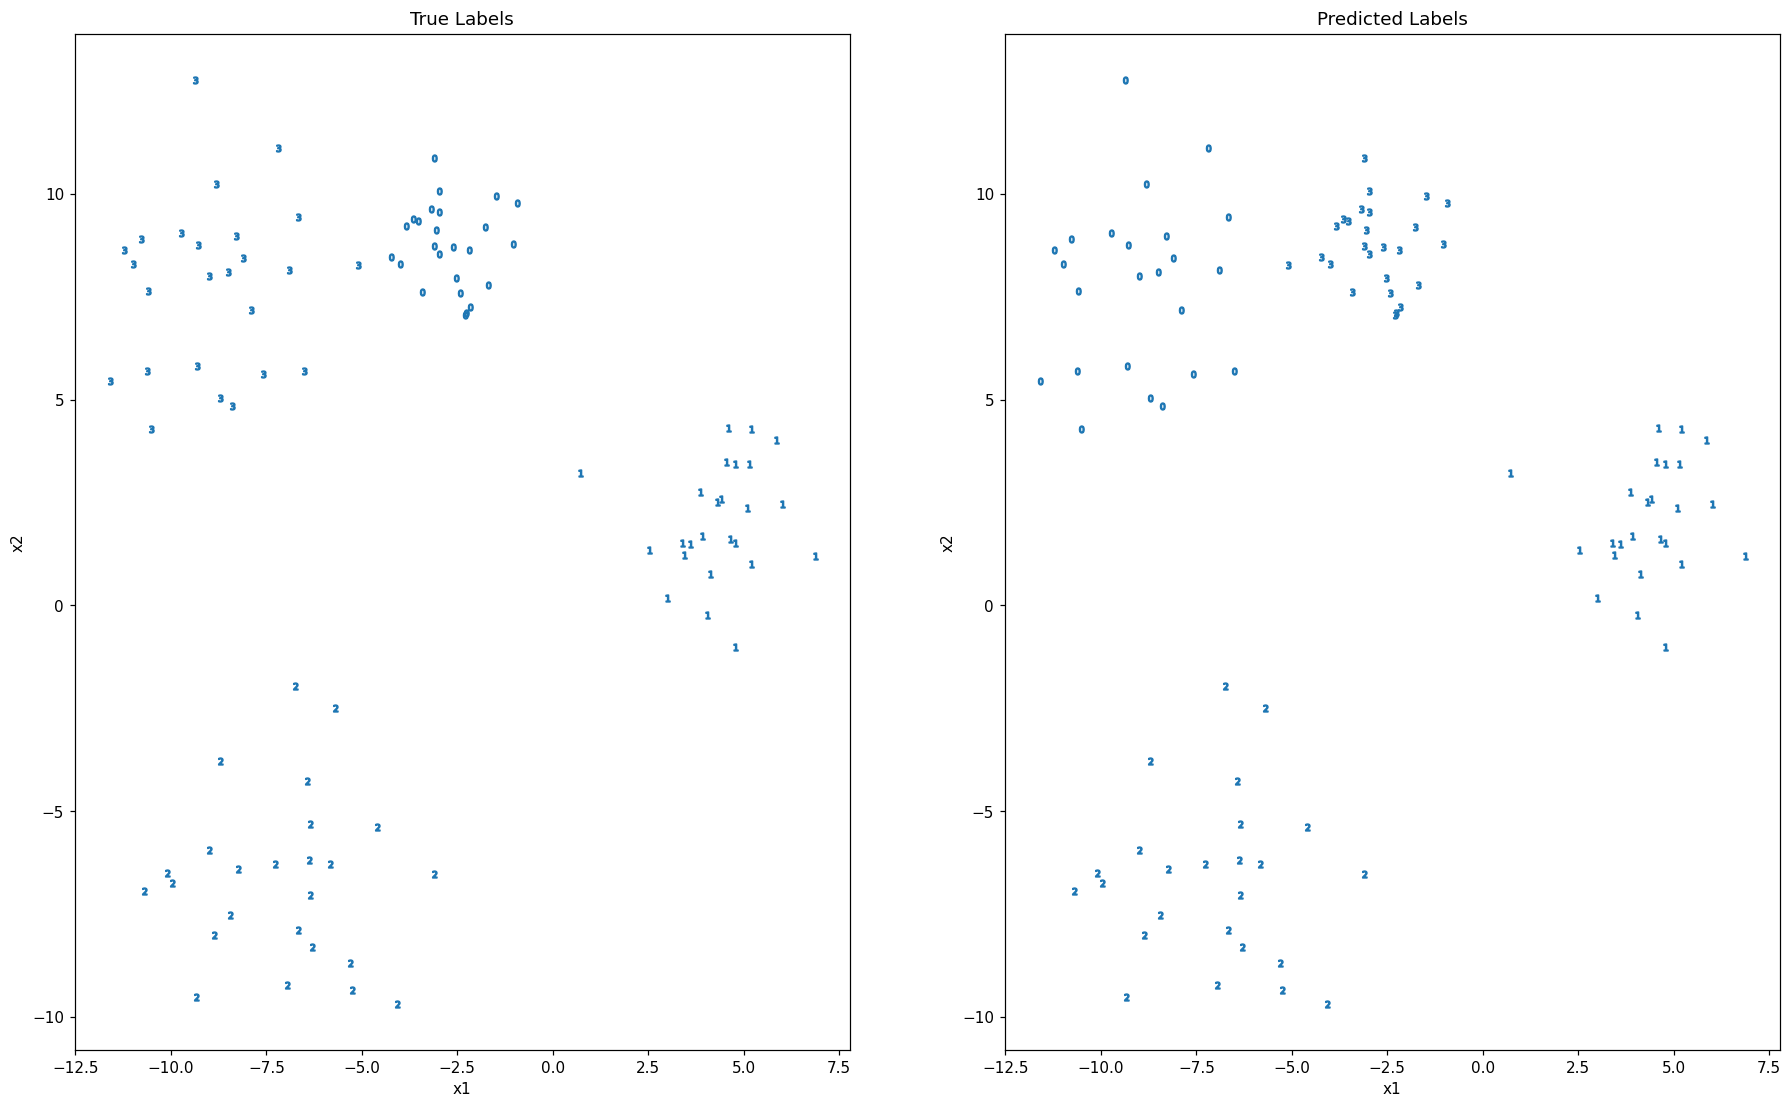

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,12), dpi=110)
plot_2d_clusters(x, y, ax[0])
ax[0].set_title("True Labels")
plot_2d_clusters(x, y_pred, ax[1])
ax[1].set_title("Predicted Labels")
plt.show()

#### Plotting with Seaborn:

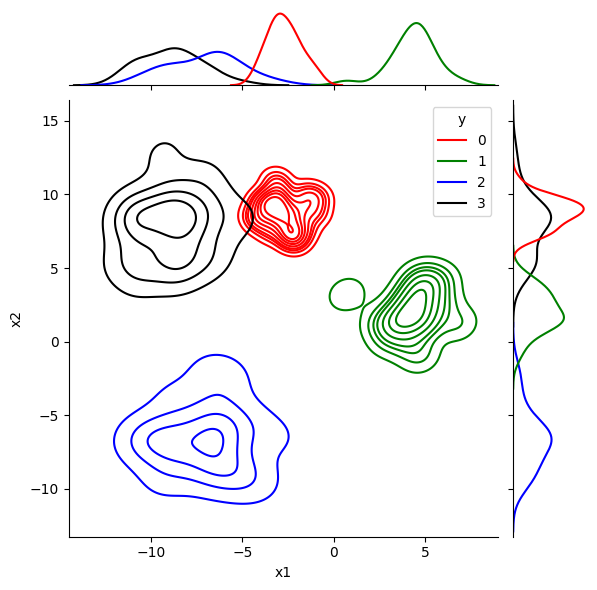

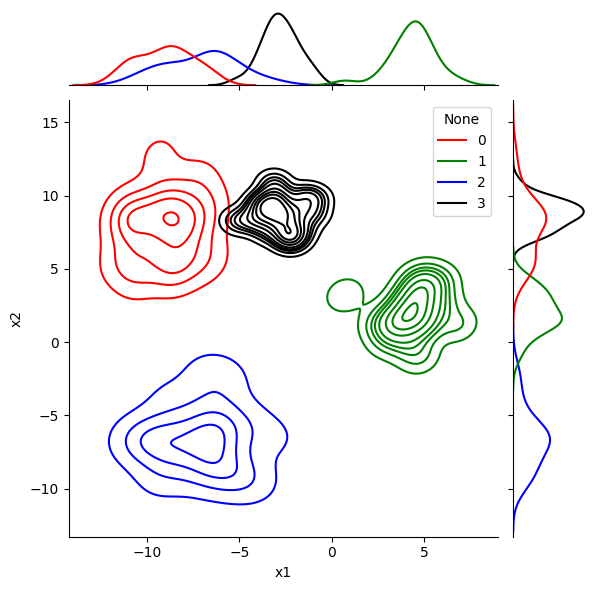

In [ ]:
sns.jointplot(
    x="x1",
    y="x2",
    hue=y,
    data=df_blobs,
    palette=["red", "green", "blue", "black"],
    kind="kde"
)

sns.jointplot(
    x="x1",
    y="x2",
    hue=y_pred,
    data=df_blobs,
    palette=["red", "green", "blue", "black"],
    kind="kde"
)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>